## Level 3: Advanced Task 
### Sales Predictions Using Basic Models
#### Aniket Gaud 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

## Loading Dataset

In [2]:
file_path = "C:/Users/Aniket/Downloads/sales_data_sample.csv" 
data = pd.read_csv(file_path, encoding='latin1')

In [3]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Selecting relevant columns and preprocessing the data

In [4]:
data = data[['ORDERDATE', 'SALES']].copy()
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
data = data.dropna(subset=['ORDERDATE'])

In [5]:
data.head()

,ORDERDATE,SALES
0,2003-02-24,2871.00
3,2003-08-25,3746.70
5,2003-10-28,3479.76
7,2003-11-18,5512.32
9,2004-01-15,4708.44


## Aggregate sales by month

In [6]:
data['Month'] = data['ORDERDATE'].dt.to_period('M')
monthly_sales = data.groupby('Month').agg({'SALES': 'sum'}).reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

In [7]:
monthly_sales.head()

,Month,SALES
0,2003-01-01,99323.96
1,2003-02-01,81965.08
2,2003-03-01,91861.06
3,2003-04-01,136903.47
4,2003-05-01,121219.31


## Performing trend analysis using Simple Exponential Smoothing

In [11]:
model = SimpleExpSmoothing(monthly_sales['SALES']).fit(smoothing_level=0.2, optimized=False)
monthly_sales['Forecast'] = model.fittedvalues
monthly_sales.head()

,Month,SALES,Forecast
0,2003-01-01,99323.96,99323.96000
1,2003-02-01,81965.08,99323.96000
2,2003-03-01,91861.06,95852.18400
3,2003-04-01,136903.47,95053.95920
4,2003-05-01,121219.31,103423.86136


## Project next month's sales

In [15]:
next_month = pd.Timestamp(monthly_sales['Month'].iloc[-1]) + pd.DateOffset(months=1)
next_month_forecast = model.forecast(1)

##  Visualizing the trend and forecast

In [18]:
print(type(next_month_forecast))


<class 'pandas.core.series.Series'>


In [21]:
# Extracting the value from the Series
forecast_value = next_month_forecast.iloc[0] 


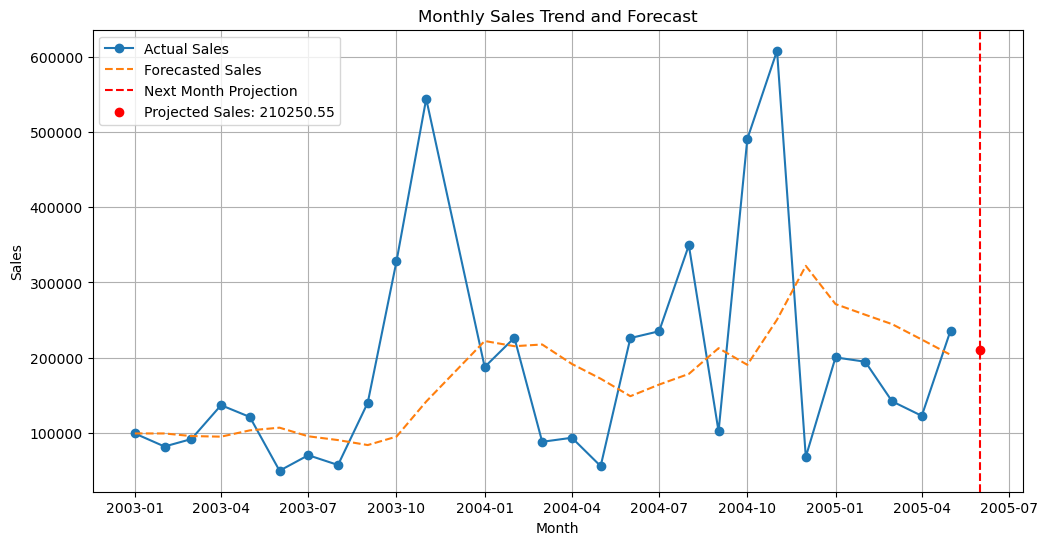

Next Month Sales Projection: 210250.55292544133


In [22]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['SALES'], label='Actual Sales', marker='o')
plt.plot(monthly_sales['Month'], monthly_sales['Forecast'], label='Forecasted Sales', linestyle='--')
plt.axvline(x=next_month, color='red', linestyle='--', label='Next Month Projection')
plt.scatter(next_month, forecast_value, color='red', label=f'Projected Sales: {forecast_value:.2f}')
plt.title('Monthly Sales Trend and Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

# Output the projected sales for the next month
print("Next Month Sales Projection:", forecast_value)
